In [16]:
import numpy as np

In [17]:
labels = np.load('outputs.npy')

In [18]:
labels.shape

(10, 3, 513, 257, 50)

In [19]:
import torch

In [35]:
B = torch.Tensor(labels)

In [36]:
import matplotlib.pyplot as plt

In [37]:
B.shape

torch.Size([10, 3, 513, 257, 50])

In [38]:
B = torch.permute(B, (0, 2, 3, 4, 1))

In [39]:
B.shape

torch.Size([10, 513, 257, 50, 3])

In [40]:
Bx = B[..., 0]
By = B[..., 1]
Bz = B[..., 2]

In [41]:
from tool.diff import *

In [63]:
B.shape

torch.Size([10, 513, 257, 50, 3])

In [62]:
B[..., 0, :].shape

torch.Size([10, 513, 257, 3])

In [61]:
loss_bc = B[..., 0, :] - 2*(B[..., 0, :])

In [65]:
loss_bc.shape

torch.Size([10, 513, 257, 3])

In [ ]:
B[..., 0, :]

In [42]:
b_bottom = B[..., 0, :]
b_bottom.shape

torch.Size([10, 513, 257, 3])

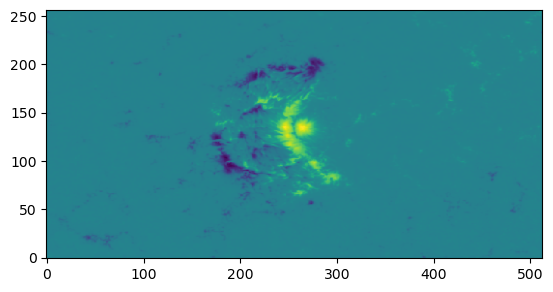

In [43]:
plt.imshow(b_bottom[0, ..., 2].T, origin='lower')

In [44]:
Bx.shape

torch.Size([10, 513, 257, 50])

In [45]:
Jx, Jy, Jz = curl(Bx, By, Bz, 1, 1, 1)

B = torch.stack([Bx, By, Bz], -1)
J = torch.stack([Jx, Jy, Jz], -1)

JxB = torch.cross(J, B, -1)

In [46]:
B.shape, J.shape, JxB.shape

(torch.Size([10, 513, 257, 50, 3]),
 torch.Size([10, 513, 257, 50, 3]),
 torch.Size([10, 513, 257, 50, 3]))

In [56]:
loss_ff = (JxB**2).sum(-1)

In [57]:
loss_ff.shape

torch.Size([10, 513, 257, 50])

In [58]:
torch.mean(loss_ff)

tensor(3.7947e-05)

In [53]:
divB = divergence(Bx, By, Bz, 1, 1, 1)

In [54]:
divB.shape

torch.Size([10, 513, 257, 50])

In [51]:
torch.linalg.norm(JxB, -1).shape

RuntimeError: linalg.norm: If dim is not specified but ord is, the input must be 1D or 2D. Got 5D.

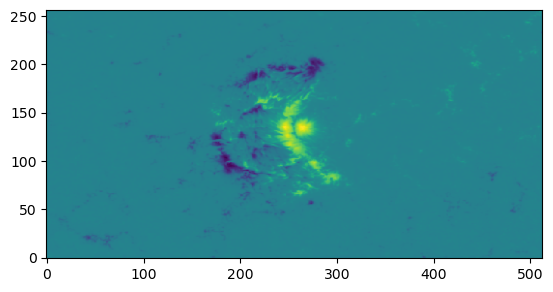

In [47]:
plt.imshow(B[0, ..., 0, 2].T, origin='lower')

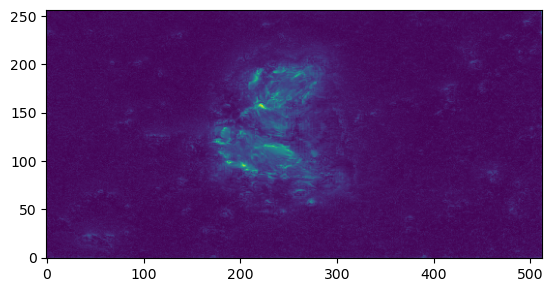

In [48]:
plt.imshow(np.linalg.norm(J[0, ...], axis=-1).sum(2).T, origin='lower')

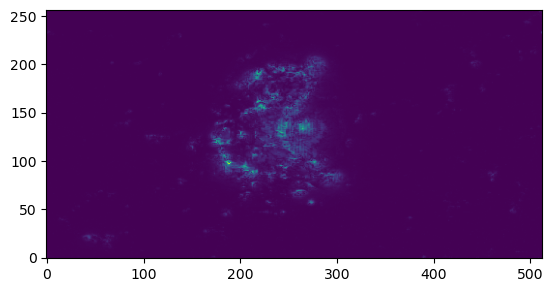

In [50]:
plt.imshow(np.linalg.norm(JxB[0, ...], axis=-1).sum(2).T, origin='lower')